In [1]:
import stackview
from nanopyx.data.download import ExampleDataManager

downloader = ExampleDataManager()
z = downloader.get_ZipTiffIterator(
    "SMLMS2013_HDTubulinAlexa647", as_ndarray=True)

# , display_width=512, display_height=512)
stackview.slice(z, continuous_update=True, zoom_factor=2, zoom_spline_order=0)


If you find the 'SMLMS2013_HDTubulinAlexa647' dataset useful, please cite: Sage et al, Nature Methods, 2015 - https://doi.org/10.1038/nmeth.3442


In [2]:
%%prun -s cumulative -q -l 100 -T  prun_radiality.profile

import numpy as np
from nanopyx.core.transform.radiality import Radiality

imSmall = z[:, :, :]
rad = Radiality(magnification=2, ringRadius=0.5, border=0,
                radialityPositivityConstraint=1, doIntensityWeighting=1)
imRad, imIW, imGx, imGy = rad.calculate(imSmall)


 
*** Profile printout saved to text file 'prun_radiality.profile'.


In [3]:
stackview.curtain(imIW, imRad, continuous_update=True, zoom_factor=2,
                  zoom_spline_order=0)  # , display_width=512, display_height=512)


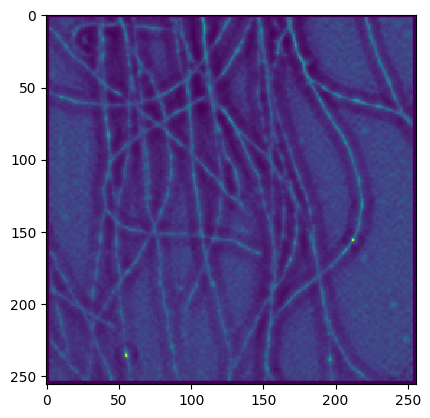

In [4]:
from matplotlib import pyplot as plt
plt.imshow(np.mean(imRad, 0), interpolation='nearest')
plt.show()
